# Multiple linear regression.

Unlike the simple linear regression model, the multiple linear regression model is defined as any linear regression model with at least two explanatory variables. But what do we do when we have several variables? This is what we will see in this chapter. And you will finally be able to measure all the power of linear regression despite its simplicity!


## Variables studied

First of all, we will load our dataset. This is a fake Dataset for the example. 

In [25]:
import pandas as pd
df = pd.read_csv('./data/data_multi.csv')

In [26]:
df

,x_1,x_2,y
0,1.054452,-1.070753,-81.464433
1,-0.362741,-0.634322,-78.752795
2,-0.854096,0.313068,2.218414
3,1.326386,0.298238,52.234160
4,-0.461585,-1.315907,-159.639258
5,1.943621,-1.173123,-51.806001
6,-1.602058,0.625231,82.457071
7,-0.401781,0.177426,-10.956509
8,-0.977278,1.867558,184.086053
9,0.378163,0.154947,13.651390


In [27]:
df.shape

(100, 3)

As you can see we now have 100 rows, 2 features and 1 target.

**Exercise :** Create the `X` and `y` variables and define which column will be the target and which column will be the feature. 
They must be of type `numpy.ndarray`. Our variable `X` has two dimensions this time.

In [56]:
import pandas as pd
import numpy as np

y_target= np.array(df.y)
X_features = np.array([[df.x_1], [df.x_2]])
print(type(y_target))


<class 'numpy.ndarray'>


In [54]:
#print(X_features)
print(X_features.shape)
#y_target.shape

(2, 1, 100)


### Relationship between variables

To represent a dataset that has two features, we can use 3D visualization.

**Exercise :** Use a 3D matplotlib (or other) graph to view the dataset. 

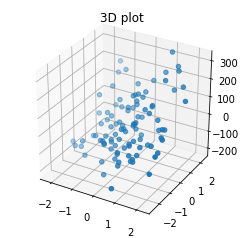

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.x_1,df.x_2, y_target)
ax.set_title("3D plot") 
plt.show()

If you change the camera angle, you should come across something that looks like this: 
<img src="./assets/3dplot.png" />

This appears to be a positive linear correlation. What do you say?  


If our dataset has more than two dimensions, then we won't be able to display it in 3D. Unfortunately for us, the human being can only perceive 3 dimensions. In this case, we will have no other choice than to display one scatter plot per variable.

And it is there that we realize that the linear regression may be very simple, as soon as we go beyond 3 dimensions, the human being will hardly be able to visualize all the data while the machines are doing very well.

**Exercise :** Create a scatter plot for each variable with respect to the target. You may use  `plt.tight_layout()` after plotting if the graph is too cramped.

In [70]:
print(X_features.shape)
X_features[0,0,:].shape

(2, 1, 100)


(100,)

(100,)


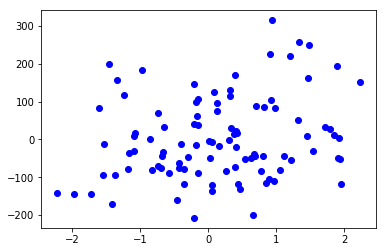

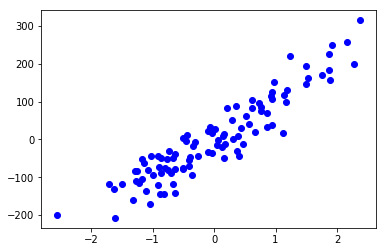

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [119]:
import matplotlib.pyplot as plt
ax = plt.gca()
X_features = X_features.T
print(y_target.shape)
X_features = X_features.reshape((100, 2))
plt.scatter(X_features[:,0].T, y_target.T, color="blue")
plt.show()
plt.scatter(X_features[:,1].T, y_target.T, color="blue")
plt.show()
plt.tight_layout

**Exercise :**
1. Create a `gradient_descent` function that receives as parameter `X`, `y`, `theta`, `learning_rate` and `n_iterations`.
2. In the function, create a variable `cost_history` with a matrix filled with 0 and which has a length of `n_iterations`. We will use it to display the plot of the model learning process.
3. Create a loop that iterates up to `n_iterations`.
4. In the loop, update `theta` with the formula of the gradient descent (the example above).
5. In the loop, update `cost_history[i]` with the values of `MSE(X,y,theta)`.
6. return `theta` and `cost_history`.

**Exercise :** Show correlation coefficients. 

In [76]:
X_new = np.reshape(X_features, (100, 2,1))

(100, 1, 2)


AxisError: axis 100 is out of bounds for array of dimension 3

In [120]:
import scipy as sc
print(sc.stats.spearmanr(X_features[:,0].T, y_target.T))
print(sc.stats.spearmanr(X_features[:,1].T, y_target.T))
print(sc.stats.pearsonr(X_features[:,0].T, y_target.T))
print(sc.stats.pearsonr(X_features[:,1].T, y_target.T))

SpearmanrResult(correlation=0.2131413141314131, pvalue=0.033242149992682116)
SpearmanrResult(correlation=0.9236483648364835, pvalue=1.3159076055708707e-42)
(0.23565036822170068, 0.018264193138231556)
(0.9302992377775382, 1.778975795406356e-44)


### Split the dataset

You now know the process!

**Exercise :** Import `train_test_split` from `sklearn` and split the dataset and create the variables `X_train`, `X_test`, `y_train`, `y_test`.

In [121]:
import sklearn
import numpy as np
from sklearn import datasets
from sklearn. model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

##  Load and fit the model (with Sklearn)

How to use `sklearn` now with multiple features ? Well, it's simple, you don't change anything. `sklearn` takes care of everything for you.

1. Import `LinearRegression` from `sklearn`
2. Create a `regressor` variable and instantiate your `LinearRegression` class.
3. Train your model with `X_train` and `y_train`.
4. Display the score of your model with `X_train` and `y_train`.
5. Use the predict method of your model on your test dataset (`X_test`).
6. Display the score of your model with `X_test` and `y_test`.

In [122]:

from sklearn.linear_model import LinearRegression

# Choose your test size to split between training and testing sets:
print(X_train.shape)
regressor = LinearRegression()
#np.squeeze(X_train).shape
#np.squeeze(y_train).shape
regressor.fit(X_train, y_train)
print(y_test)
print(X_test)

(80, 2)
[-120.44423135  -43.4715363   248.97382491  -32.3369787   194.56190862
   15.90474192  -43.24060741  -31.5747587   -47.35779025  -81.46443256
   87.31109827   -8.02127381   31.76187434  118.36250221  315.5134693
 -159.63925844 -171.02794704 -118.64138257  -15.05942454 -207.68577019]
[[ 0.0519454  -0.90729836]
 [ 1.11701629 -0.91282223]
 [ 1.48051479  1.92294203]
 [-0.66347829 -0.09845252]
 [ 1.89588918  1.48825219]
 [-1.07993151  1.12663592]
 [ 0.68159452 -1.03424284]
 [-1.09940079  0.37642553]
 [-0.30230275 -0.38732682]
 [ 1.05445173 -1.07075262]
 [ 0.70657317  0.3563664 ]
 [ 0.05616534 -0.31155253]
 [ 1.71334272 -0.06824161]
 [-1.23482582  1.13940068]
 [ 0.94447949  2.38314477]
 [-0.4615846  -1.31590741]
 [-1.42001794 -1.04855297]
 [ 0.4393917  -1.49125759]
 [-0.18718385  0.04575852]
 [-0.21274028 -1.61389785]]


In [123]:
print(regressor.intercept_)

-1.1782989830583963


In [124]:
print(regressor.coef_)

[24.39620093 97.03129404]


In [125]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_train)

r2_score(y_train, y_pred)

0.9255819294651559

In [126]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test)

r2_score(y_test, y_pred)

0.9418412685059916

In [127]:
r2_score(y_test, y_pred)

0.9418412685059916

And voilà !

## From Scratch 
You will see that with matrices, it doesn't change much in the way of proceeding. Matrix writing, moreover, remains the same as simple regression. 

### Transform to matrix

$$
\\ Y = X \cdot \theta \\
$$
The $Y$ vector is the same too
$$ Y =
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
... \\
y^{(m)}\\
\end{bmatrix}
$$

The $X$ matrix will have as many dimensions as there are features +1  (n+1)

$$ X =
\begin{bmatrix}
x^{(1)}_1, x^{(1)}_2, ..., x^{(m)}_{n}, 1\\
x^{(2)}_1, x^{(2)}_2, ..., x^{(m)}_{n}, 1\\
x^{(3)}_1, x^{(3)}_2, ..., x^{(m)}_{n}, 1\\
x^{(m)}_1,x^{(m)}_2, ..., x^{(m)}_{n}, 1\\
\end{bmatrix}
$$

The theta vector will have as many lines as there are parameters +1 (for the constant). 
$$ \theta =
\begin{bmatrix}
a\\
b\\
c\\
... \\
\end{bmatrix}
$$

For our case with our dataset, we can write it like this: 

$$
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
... \\
y^{(m)}\\
\end{bmatrix}
=
\begin{bmatrix}
x^{(1)}_1, x^{(1)}_2, 1\\
x^{(2)}_1, x^{(2)}_2, 1\\
x^{(3)}_1, x^{(3)}_2, 1\\
x^{(m)}_1,x^{(m)}_2,  1\\
\end{bmatrix}
\cdot
\begin{bmatrix}
a\\
b\\
c\\
\end{bmatrix}
$$

**Exercise :** Create a variable `X` which contains a matrix of shape `(100,3)` with two column's filled with values of our dataframe and then another one with 1's.

In [141]:
import pandas as pd
df = pd.read_csv('./data/data_multi.csv')
X1 = np.array(df.x_1)
X2 = np.array(df.x_2)
X3 = np.ones(100)
X=[X1,X2]
X = np.vstack((X1, X2,X3))
X=X.T
print(X.shape)

(100, 3)


**Exercise :** Check that your matrix is of shape `(100,3)`. 

In [142]:
print(X.shape) # X is a 100*3 matrix

(100, 3)


**Exercise :** Create the theta vector with three random values. Your vector must be of shape 
`(3,1)`.

In [148]:
theta = np.random.random(3)
print(theta.shape)

(3,)


## Create and fit the model
### Define your model

**Exercise :** Create a `model` function that receives as parameter `X` and `theta`. The function must return the computed predictions `y_pred`. This is exactly the same model as last time. 

In [149]:
model = lambda X, theta: X.dot(theta)

In [ ]:
#another method
#def model(X,theta):
    #F = np.matmul(X,theta)
    #return F

### Cost function

Well we have the model, the $\theta$ vector, the $X$ matrix. What are we missing? The cost function of course!
And you know what? This too is exactly the same MSE function from last time. 

$$MSE(\theta) = \frac {1}{2m}  \sum (X \cdot \theta - Y)^2$$

**Exercise :** Create a MSE function that receives as parameters `X`, `y` and `theta` using the example above.

In [150]:
#m= y.size # number of training examples
def MSE(X,y,theta):
    m=len(X)
    mse=1/(2*m) * sum((np.dot(X , theta) - y)**2)
    return mse

In [153]:
MSE(X, y_target,theta)

5794.020095682752

### Gradient descent
It's time to find the minimum of our function. Well again, nothing changes compared to the last time. 

$$ \frac {\partial MSE(\theta) }{\partial \theta}  = \frac {1}{m} X^T \cdot (X \cdot \theta - Y)$$

**Exercise :** Create a `grad` function that receives as parameter `X`, `y`, `theta`.

In [154]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [155]:
grad(X, y_target, theta)

array([ -25.52375896, -102.39038701,   -1.65896802])

**Exercise :**

1. Create a `gradient_descent` function that receives as parameter `X`, `y`, `theta`, `learning_rate`, `n_iterations`.
2. In the function, create a variable `cost_history` with a matrix filled with 0 and which has a length of `n_iterations`. We will use it to display the histogram of the model learning process.
3. Create a loop that iterates up to `n_iterations`.
4. In the loop, update `theta` with the formula of the gradient descent (the example above).
5. In the loop, update `cost_history[i]` with the values of `MSE(X,y,theta)`.
6. return `theta` and `cost_history`.

In [156]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        print(i)
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = MSE(X,y,theta) # values of MSE
        
         #cost_history.append(computeCost(X, y, theta))
    return theta, cost_history

### Train your model 

**Exercise :** Create variables `n_iterations` and `learning_rate`.

In [157]:
n_iterations = 1000
learning_rate = 0.01 #alpha


**Exercise:** Create variables `theta_final`, `cost_history` and call `gradient_descent()`.

In [159]:
theta_final, cost_history = gradient_descent(X, y_target, theta, learning_rate, n_iterations)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

**Exercise :** 
Create a `predictions` variable that contains `model(X, theta_final)`.



In [160]:
predictions=model(X, theta_final)

**Exercise :** Plot your predictions in 3D and the true values of the dataset.

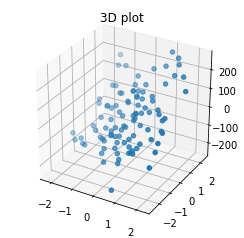

In [164]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1], predictions)
ax.set_title("3D plot") 
plt.show()

**Exercise :** Plot `cost_history`.

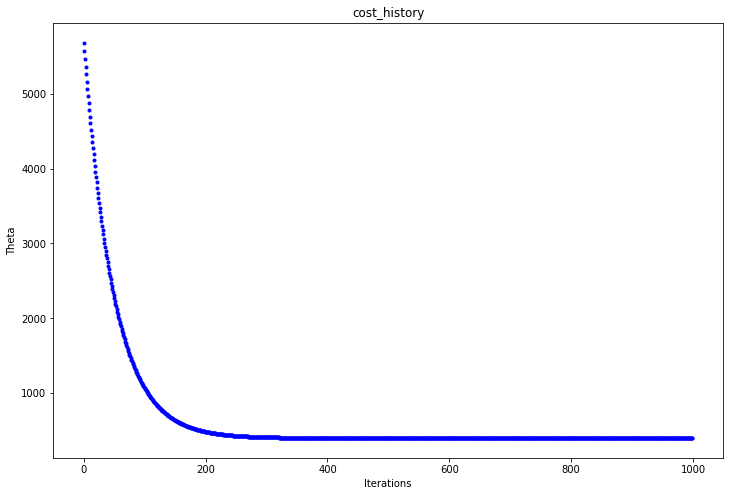

In [165]:
fig,ax = plt.subplots(figsize=(12,8))
plt.title('cost_history')
plt.ylabel('Theta')
plt.xlabel('Iterations')
_=ax.plot(range(n_iterations),cost_history,'b.')

### Evaluation

In [166]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [167]:
coef_determination(y_target, predictions)

0.9320499572241326

### Congratulations !

You are now able to create a multiple variable regression model from scratch, well, from the matrix!

<img src="https://media.giphy.com/media/W9lzJDwciz6bS/giphy.gif">